In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [17]:
abs=pd.read_excel("C:/Users/Venu/Desktop/HDS-Datasets_Exersice/Absenteeism_at_work.xls")

In [18]:
abs

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239554,...,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239554,...,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239554,...,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239554,...,0,3,1,0,0,1,88,172,29,8


In [128]:
k=5
cent_change=0.0001
max_iter=300

In [129]:
colors=10*['g','r','c','b','k','y']

In [130]:
def fit(data,k,max_iter,tol):
    centroids={}
    for i in range(k):
        centroids[i]=data[i]
        
    for i in range(max_iter):
        classifications={}
        
        for i in range(k):
            classifications[i]=[]
        
        for featureset in data:
            distances=[np.linalg.norm(featureset-centroids[centroid]) for centroid in centroids]
            #print(distances)
            classification=distances.index(min(distances))
            #print(classification)
            classifications[classification].append(featureset)
            #print(classifiations)
        
        prev_centroids=dict(centroids)
    
        for classification in classifications:
            centroids[classification]=np.average(classifications[classification],axis=0)
        
        optimised=True
    
        for c in centroids:
            original_centroid=prev_centroids[c]
            current_centroid=centroids[c]
            if np.sum((current_centroid-original_centroid)/original_centroid*100.0)>tol:
                optimised=False
            
        if optimised:
            break
     
    return centroids, classifications

In [131]:
def predict(data,centroids):
    distances=[np.linalg.norm(data-centroids[centroid]) for centroid in centroids]
    classification=distances.index(min(distances))
    return classification

In [132]:
abs.keys()

Index(['ID', 'Seasons', 'Age', 'Work load Average/day ', 'Education', 'Son',
       'Pet', 'Weight', 'Height', 'Reason_for_absence', 'Month_of_absence',
       'Day_of_the_week', 'Transportation_expense',
       'Distance_from_Residence_to_Work', 'Service_time', 'Hit_target',
       'Disciplinary_failure', 'Social_drinker', 'Social_smoker',
       'Body_mass_index', 'Absenteeism_time_in_hours'],
      dtype='object')

In [133]:
features=pd.concat([abs.ID,abs.Reason_for_absence,abs.Month_of_absence,abs.Day_of_the_week,abs.Seasons,abs.Transportation_expense,abs.Distance_from_Residence_to_Work,abs.Service_time,abs.Age,abs.Hit_target,abs.Education,abs.Son,abs.Disciplinary_failure,abs.Social_drinker,abs.Social_smoker,abs.Pet,abs.Weight,abs.Height,abs.Body_mass_index],axis=1)

In [134]:
features

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Hit_target,Education,Son,Disciplinary_failure,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index
0,0.285714,0.928571,0.583333,0.25,0.000000,0.633333,0.659574,0.428571,0.193548,0.842105,0.000000,0.50,0.0,1.0,0.0,0.125,0.653846,0.272727,0.578947
1,1.000000,0.000000,0.583333,0.25,0.000000,0.000000,0.170213,0.607143,0.741935,0.842105,0.000000,0.25,1.0,1.0,0.0,0.000,0.807692,0.454545,0.631579
2,0.057143,0.821429,0.583333,0.50,0.000000,0.225926,0.978723,0.607143,0.354839,0.842105,0.000000,0.00,0.0,1.0,0.0,0.000,0.634615,0.212121,0.631579
3,0.171429,0.250000,0.583333,0.75,0.000000,0.596296,0.000000,0.464286,0.387097,0.842105,0.000000,0.50,0.0,1.0,1.0,0.000,0.230769,0.151515,0.263158
4,0.285714,0.821429,0.583333,0.75,0.000000,0.633333,0.659574,0.428571,0.193548,0.842105,0.000000,0.50,0.0,1.0,0.0,0.125,0.653846,0.272727,0.578947
5,0.057143,0.821429,0.583333,1.00,0.000000,0.225926,0.978723,0.607143,0.354839,0.842105,0.000000,0.00,0.0,1.0,0.0,0.000,0.634615,0.212121,0.631579
6,0.257143,0.785714,0.583333,1.00,0.000000,0.900000,1.000000,0.071429,0.032258,0.842105,0.000000,0.25,0.0,1.0,0.0,0.500,0.461538,0.272727,0.421053
7,0.542857,0.821429,0.583333,1.00,0.000000,0.525926,0.957447,0.357143,0.290323,0.842105,0.000000,1.00,0.0,1.0,0.0,0.000,0.173077,0.151515,0.210526
8,0.371429,0.678571,0.583333,0.00,0.000000,0.137037,0.148936,0.464286,0.225806,0.842105,0.000000,0.50,0.0,1.0,0.0,0.000,0.750000,1.000000,0.315789
9,0.000000,0.785714,0.583333,0.00,0.000000,0.433333,0.127660,0.464286,0.322581,0.842105,0.666667,0.25,0.0,0.0,0.0,0.125,0.615385,0.272727,0.526316


In [135]:
target=pd.concat([abs.Absenteeism_time_in_hours],axis=1)

In [136]:
abs=(abs-abs.min())/(abs.max()-abs.min())

In [137]:
xtrain,xtest =train_test_split(abs,test_size=0.3)

In [138]:
corelation=abs.corr('pearson')
corelation

,ID,Seasons,Age,Work load Average/day,Education,Son,Pet,Weight,Height,Reason_for_absence,...,Day_of_the_week,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Hit_target,Disciplinary_failure,Social_drinker,Social_smoker,Body_mass_index,Absenteeism_time_in_hours
ID,1.000000,0.098495,0.040899,0.092457,-0.036254,0.002767,-0.041418,-0.254222,0.076363,-0.064245,...,0.034468,-0.224163,-0.486160,-0.272704,0.018789,0.004502,-0.451338,-0.010826,-0.306924,-0.017997
Seasons,0.098495,1.000000,-0.012089,0.150439,-0.002951,0.046950,0.012356,-0.026278,-0.033737,-0.117925,...,0.046493,0.036995,-0.063108,-0.010904,-0.061154,0.151766,-0.045982,-0.048671,-0.011031,-0.005615
Age,0.040899,-0.012089,1.000000,-0.039425,-0.221882,0.056984,-0.231226,0.418730,-0.062997,-0.078608,...,0.004459,-0.227542,-0.145886,0.670979,-0.039224,0.104304,0.213183,0.121738,0.470688,0.065760
Work load Average/day,0.092457,0.150439,-0.039425,1.000000,-0.074960,0.027820,0.007114,-0.038522,0.103315,-0.123472,...,0.015646,0.005438,-0.068677,-0.000668,-0.089445,0.029026,-0.033713,0.030968,-0.090709,0.024749
Education,-0.036254,-0.002951,-0.221882,-0.074960,1.000000,-0.188622,-0.053554,-0.300574,0.100977,-0.047357,...,0.058516,-0.055065,-0.259605,-0.213000,0.101062,-0.059298,-0.420013,0.032727,-0.366884,-0.046235
Son,0.002767,0.046950,0.056984,0.027820,-0.188622,1.000000,0.108917,-0.139552,-0.014208,-0.055364,...,0.098079,0.383001,0.054230,-0.047128,-0.014091,0.072096,0.206376,0.156088,-0.144150,0.113756
Pet,-0.041418,0.012356,-0.231226,0.007114,-0.053554,0.108917,1.000000,-0.103770,-0.103143,-0.055911,...,-0.028885,0.400080,0.205941,-0.440301,0.007201,0.018881,-0.122780,0.105379,-0.076103,-0.028277
Weight,-0.254222,-0.026278,0.418730,-0.038522,-0.300574,-0.139552,-0.103770,1.000000,0.306802,-0.000269,...,-0.128980,-0.207435,-0.047859,0.455975,-0.044947,0.072225,0.378664,-0.198511,0.904117,0.015789
Height,0.076363,-0.033737,-0.062997,0.103315,0.100977,-0.014208,-0.103143,0.306802,1.000000,-0.079267,...,-0.082133,-0.194496,-0.353372,-0.053135,0.093267,-0.010498,0.169951,0.003271,-0.121049,0.144420
Reason_for_absence,-0.064245,-0.117925,-0.078608,-0.123472,-0.047357,-0.055364,-0.055911,-0.000269,-0.079267,1.000000,...,0.116319,-0.119381,0.161831,0.048425,0.088943,-0.545054,0.065441,-0.115702,0.037205,-0.173116


In [139]:
corelation['Absenteeism_time_in_hours'].sort_values()

Reason_for_absence                -0.173116
Day_of_the_week                   -0.124361
Disciplinary_failure              -0.124248
Distance_from_Residence_to_Work   -0.088363
Body_mass_index                   -0.049719
Education                         -0.046235
Pet                               -0.028277
ID                                -0.017997
Social_smoker                     -0.008936
Seasons                           -0.005615
Weight                             0.015789
Service_time                       0.019029
Month_of_absence                   0.024345
Work load Average/day              0.024749
Hit_target                         0.026695
Transportation_expense             0.027585
Social_drinker                     0.065067
Age                                0.065760
Son                                0.113756
Height                             0.144420
Absenteeism_time_in_hours          1.000000
Name: Absenteeism_time_in_hours, dtype: float64

In [140]:
f1='Reason_for_absence'
f2='Height'

In [141]:
basex=np.array(xtrain[[f1,f2]])
xtest=np.array(xtest[[f1,f2]])

In [142]:
centroids,classifications =fit(basex,k,max_iter,cent_change)

In [143]:
centroids

{0: array([0.96575342, 0.20963055]),
 1: array([0.41294643, 0.87878788]),
 2: array([0.86875   , 0.65757576]),
 3: array([0.77020677, 0.21590909]),
 4: array([0.30509582, 0.24815225])}

In [144]:
classifications

{0: [array([0.92857143, 0.27272727]),
  array([0.89285714, 0.27272727]),
  array([0.96428571, 0.24242424]),
  array([0.96428571, 0.27272727]),
  array([0.89285714, 0.21212121]),
  array([0.92857143, 0.27272727]),
  array([1.        , 0.24242424]),
  array([0.92857143, 0.18181818]),
  array([0.96428571, 0.21212121]),
  array([0.89285714, 0.21212121]),
  array([0.92857143, 0.21212121]),
  array([1.        , 0.21212121]),
  array([1.        , 0.15151515]),
  array([0.96428571, 0.21212121]),
  array([1.        , 0.15151515]),
  array([0.92857143, 0.12121212]),
  array([0.96428571, 0.21212121]),
  array([1.        , 0.15151515]),
  array([0.96428571, 0.27272727]),
  array([0.96428571, 0.21212121]),
  array([0.89285714, 0.27272727]),
  array([0.89285714, 0.18181818]),
  array([0.89285714, 0.18181818]),
  array([1.        , 0.21212121]),
  array([0.92857143, 0.12121212]),
  array([0.96428571, 0.24242424]),
  array([1.        , 0.18181818]),
  array([1.        , 0.21212121]),
  array([0.964285

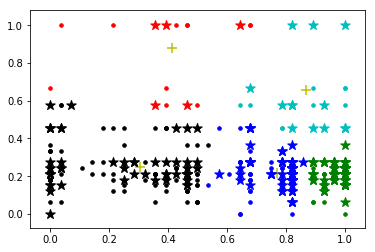

In [151]:
for centroid in centroids:
    plt.scatter(centroids[centroid][0],centroids[centroid][1], marker='+',color='y',s=100)
    
for classification in classifications:
    color=colors[classification]
    
    for next_datapoint in classifications[classification]:
        plt.scatter(next_datapoint[0],next_datapoint[1],marker='.',color=color,s=50)
        
for test in xtest:
    classification=predict(test,centroids)
    plt.scatter(test[0],test[1],marker="*",color=colors[classification],s=100)